In [117]:
import torch
from torch import nn

In [136]:
class SmallCNN(nn.Module):
    def __init__(self):
        super(SmallCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 8, 3, padding=1)
        self.conv2 = nn.Conv2d(8, 16, 3, padding=1)  # 16 filters
        self.pool = nn.MaxPool2d(2,2)
        self.fc1 = nn.Linear(16*56*56, 3)

    def forward(self, x):
        x1 = self.pool(nn.ReLU()(self.conv1(x)))  # Save conv1 output
        x2 = self.pool(nn.ReLU()(self.conv2(x1))) # Save conv2 output
        x_flat = x2.view(-1, 16*56*56)
        out = self.fc1(x_flat)
        return out, x1, x2

In [137]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [120]:
from PIL import Image
import os
import random

img_folder = "/Users/benjaminbrooke/.cache/kagglehub/datasets/aryashah2k/breast-ultrasound-images-dataset/versions/1/Dataset_BUSI_with_GT/Train_data/benign"

random_choice = random.choice(os.listdir(img_folder))

img =  os.path.join(img_folder,random_choice)

img = Image.open(img)

In [121]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import transforms, datasets

Train_dataset = transforms.Compose([transforms.Resize((224, 224)), transforms.ToTensor()])
Test_dataset = transforms.Compose([transforms.Resize((224, 224)), transforms.ToTensor()])

train_dataset = datasets.ImageFolder(
    "/Users/benjaminbrooke/.cache/kagglehub/datasets/aryashah2k/breast-ultrasound-images-dataset/versions/1/Dataset_BUSI_with_GT/Train_data",
    Train_dataset)
test_dataset = datasets.ImageFolder(
    "/Users/benjaminbrooke/.cache/kagglehub/datasets/aryashah2k/breast-ultrasound-images-dataset/versions/1/Dataset_BUSI_with_GT/Test_data",
    Test_dataset)

train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=True)

In [122]:
train_loader.batch_size

1

In [142]:
train_dataset.classes

['benign', 'malignant', 'normal']

In [123]:
def plot_kernels(layer, ncols=4):
    kernels = layer.weight.data.clone()
    n_filters = kernels.shape[0]

    nrows = (n_filters + ncols - 1) // ncols
    plt.figure(figsize=(ncols*2, nrows*2))

    for i in range(n_filters):
        k = kernels[i]
        # Normalize to 0-1
        k = (k - k.min()) / (k.max() - k.min())
        # Convert CxHxW -> HxWxC for plotting
        k_img = k.permute(1,2,0)
        plt.subplot(nrows, ncols, i+1)
        plt.imshow(k_img)
        plt.axis('off')
        plt.title(f"Kernel {i}")
    plt.show()


In [124]:
def plot_image(img):
    img = img / 2 + 0.5  # unnormalize from [-1,1] to [0,1]
    npimg = img.numpy()
    # C x H x W → H x W x C
    npimg = np.transpose(npimg, (1, 2, 0))
    plt.imshow(npimg)
    plt.axis('off')
    plt.show()

In [125]:
def plot_feature_maps(feature_map, ncols=4):
    # feature_map shape: (batch_size, channels, H, W)
    fmap = feature_map[0]  # first image in batch
    n_maps = fmap.shape[0]

    nrows = (n_maps + ncols - 1) // ncols
    plt.figure(figsize=(ncols*2, nrows*2))

    for i in range(n_maps):
        m = fmap[i]
        # Normalize to 0-1
        m = (m - m.min()) / (m.max() - m.min())
        plt.subplot(nrows, ncols, i+1)
        plt.imshow(m.detach().numpy(), cmap='gray')
        plt.axis('off')
        plt.title(f"Map {i}")
    plt.show()


In [138]:
model = SmallCNN()



model.parameters

<bound method Module.parameters of SmallCNN(
  (conv1): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=50176, out_features=3, bias=True)
)>

torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
Label: 0


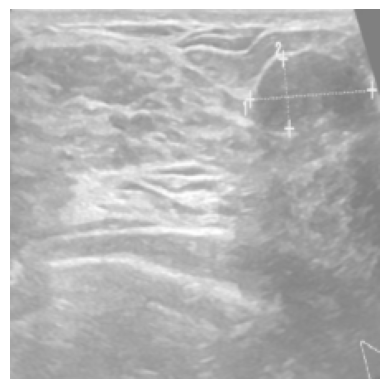

Epoch 1 Kernels conv1:


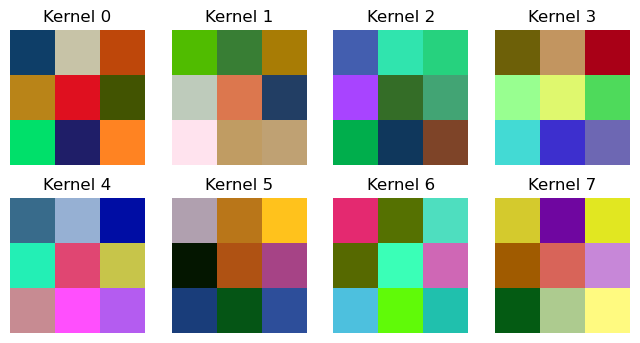

Epoch 1 Feature maps conv1:


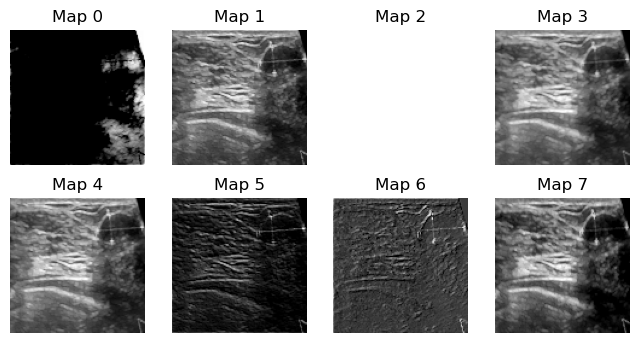

Epoch 1 Feature maps conv2:


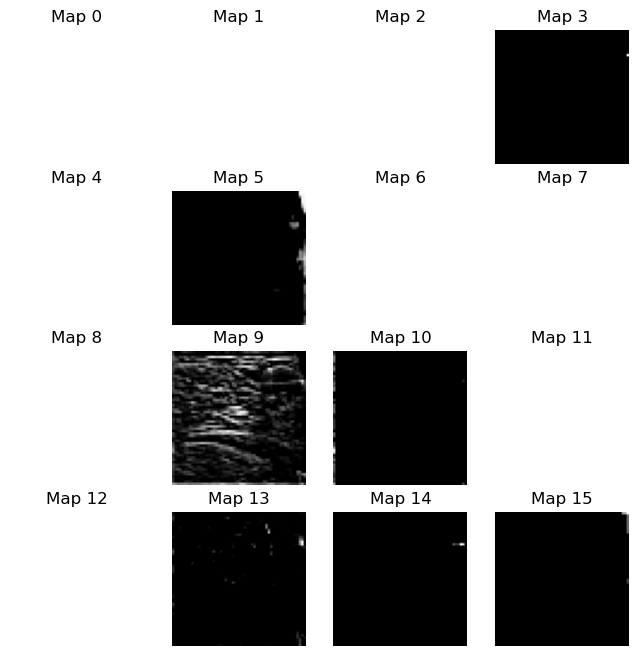

torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([

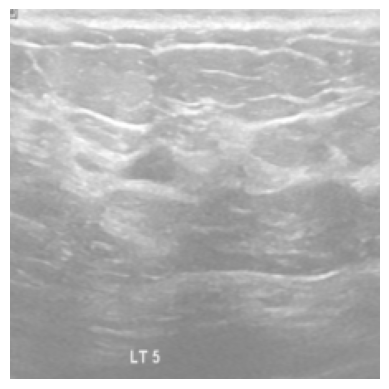

Epoch 2 Kernels conv1:


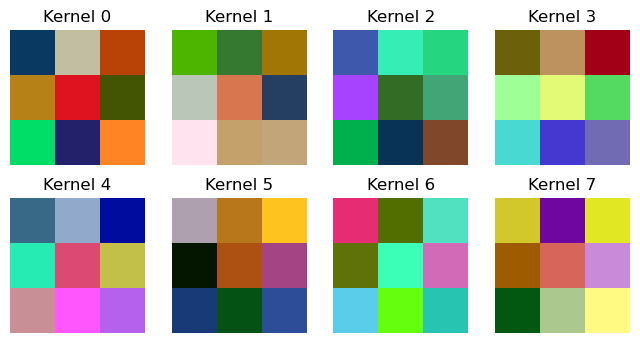

Epoch 2 Feature maps conv1:


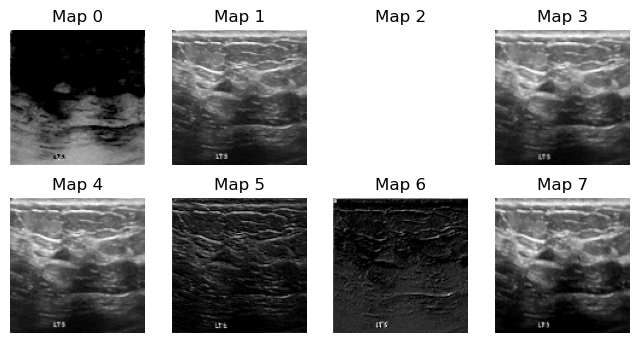

Epoch 2 Feature maps conv2:


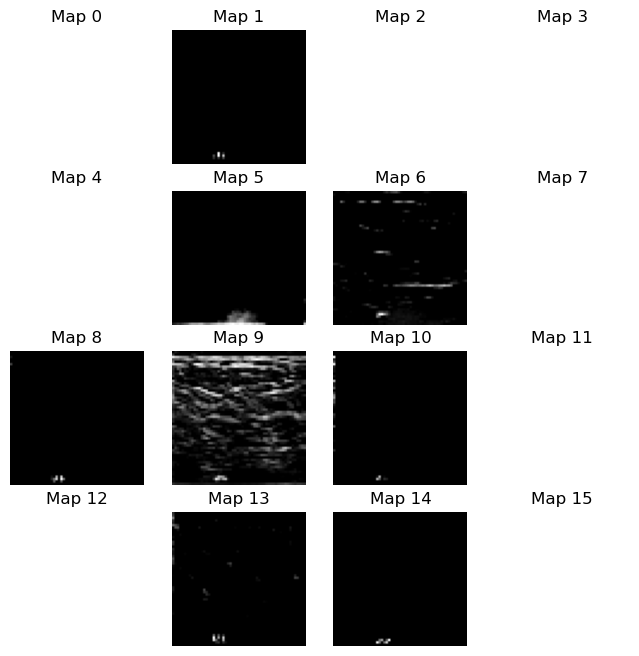

torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([

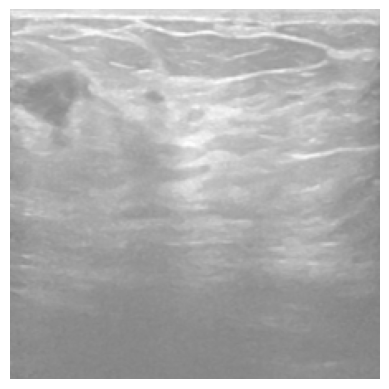

Epoch 3 Kernels conv1:


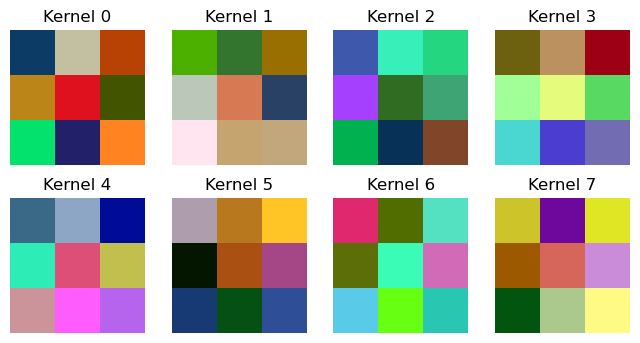

Epoch 3 Feature maps conv1:


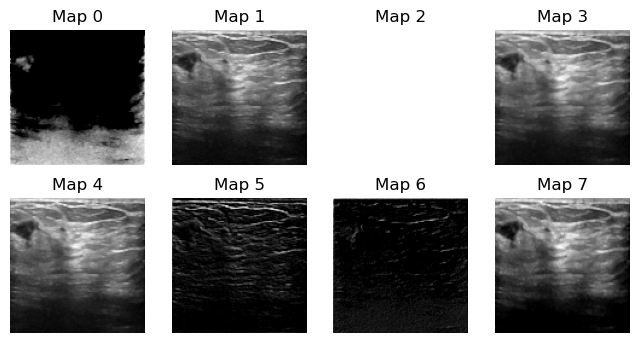

Epoch 3 Feature maps conv2:


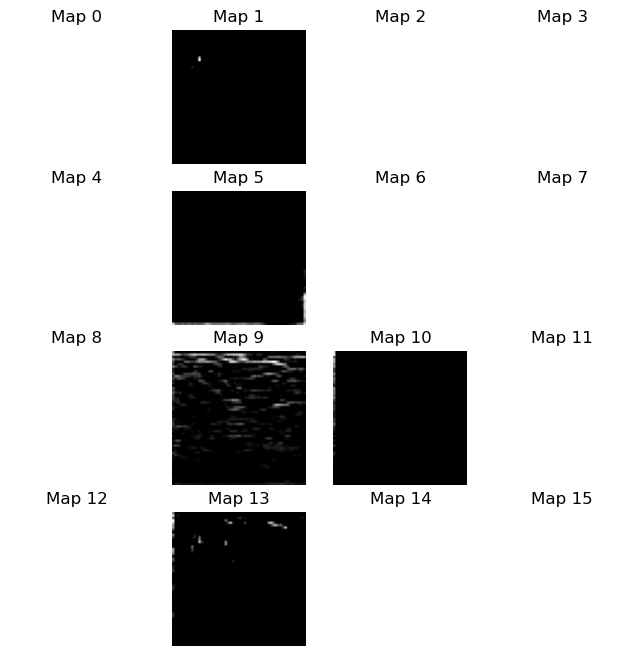

torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([

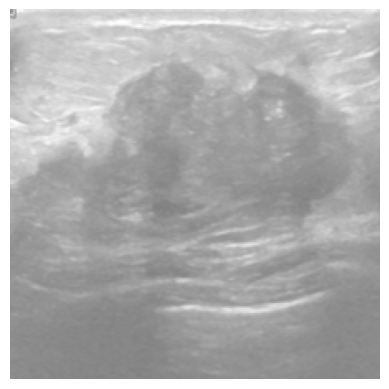

Epoch 4 Kernels conv1:


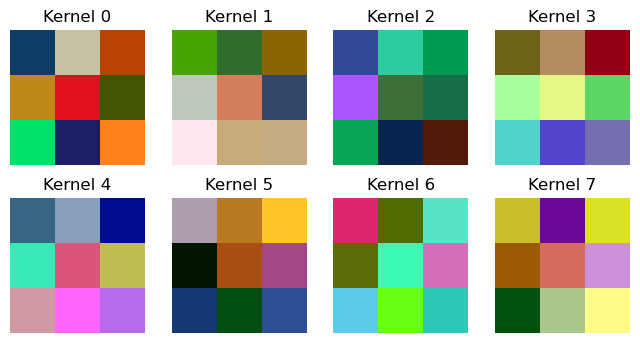

Epoch 4 Feature maps conv1:


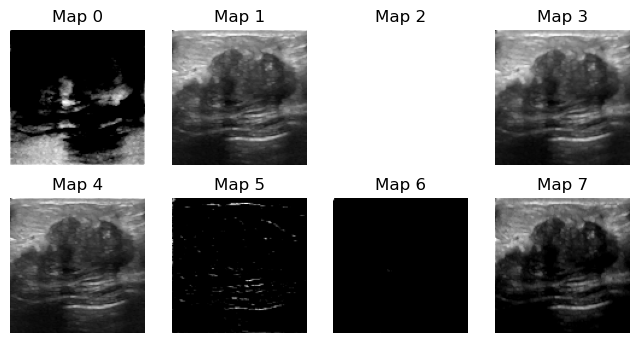

Epoch 4 Feature maps conv2:


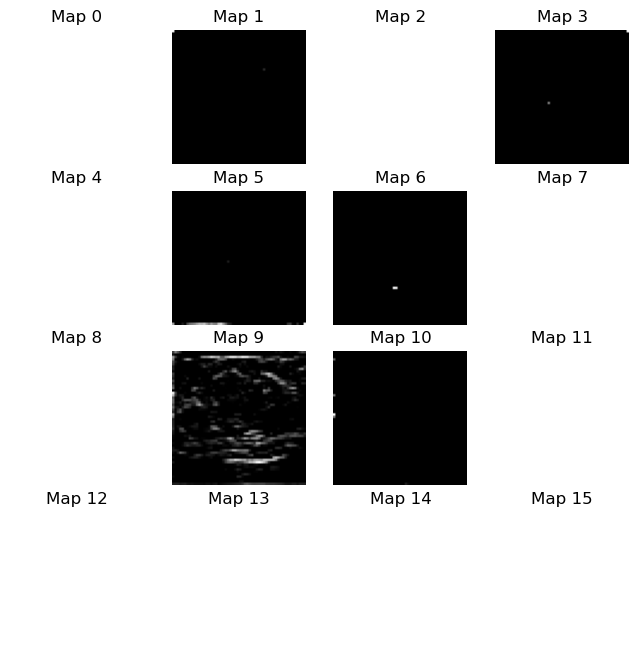

torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([

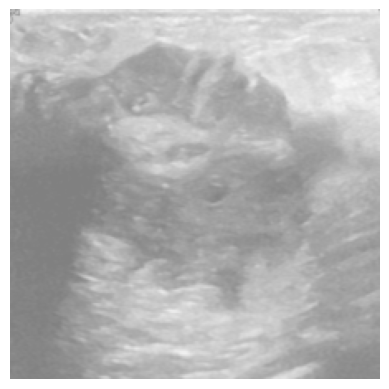

Epoch 5 Kernels conv1:


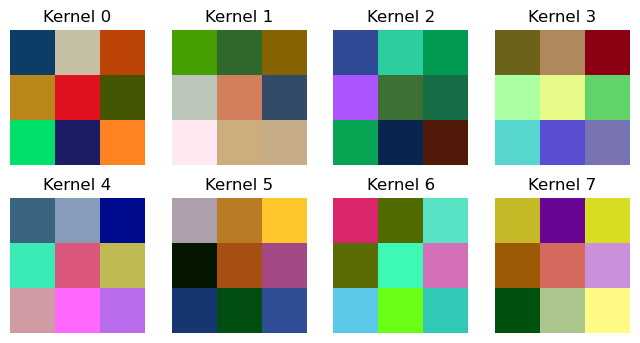

Epoch 5 Feature maps conv1:


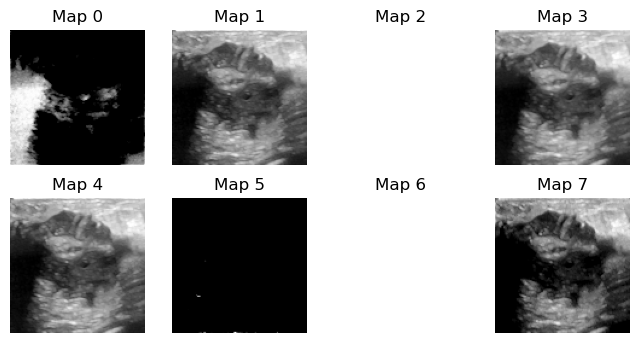

Epoch 5 Feature maps conv2:


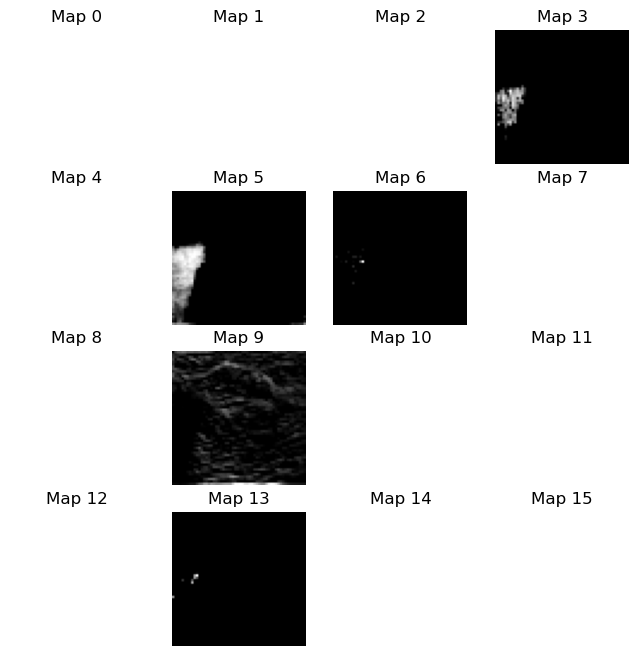

torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([

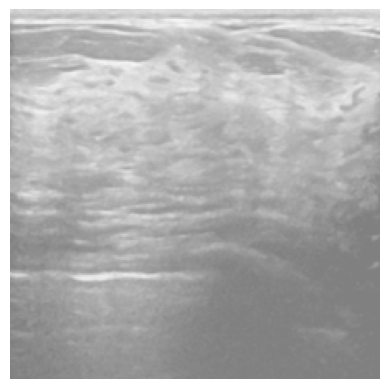

Epoch 6 Kernels conv1:


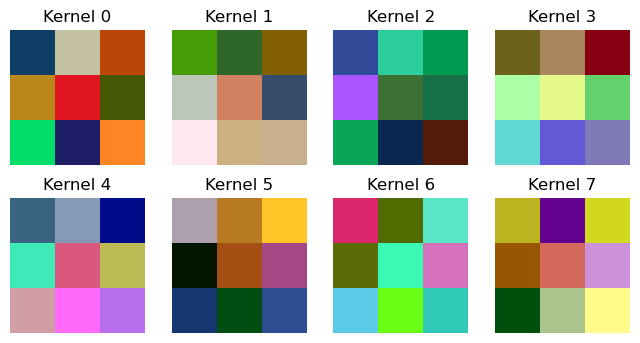

Epoch 6 Feature maps conv1:


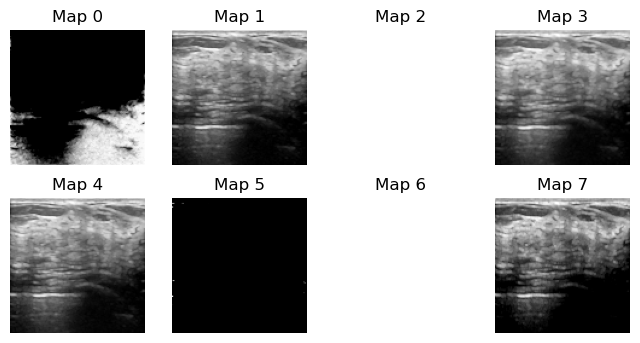

Epoch 6 Feature maps conv2:


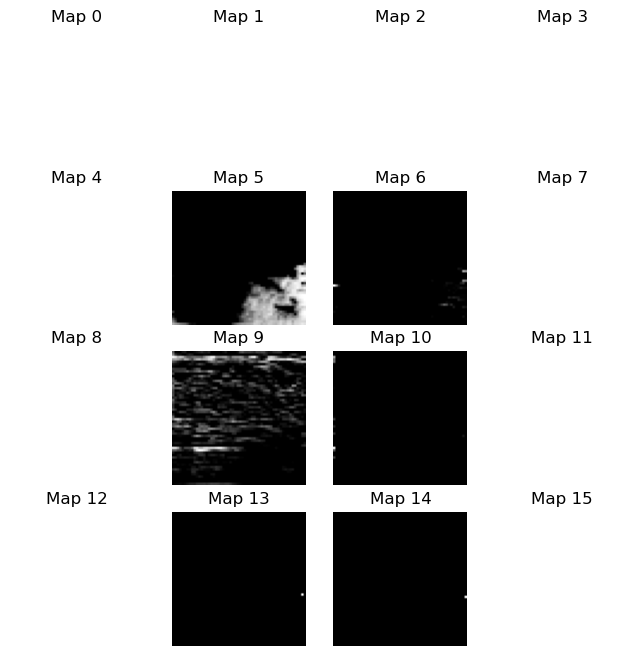

torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([

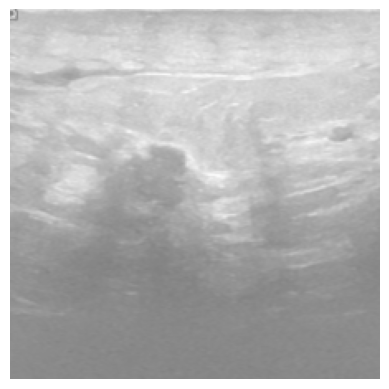

Epoch 7 Kernels conv1:


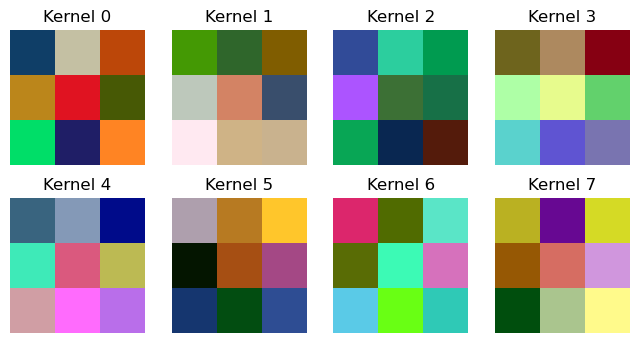

Epoch 7 Feature maps conv1:


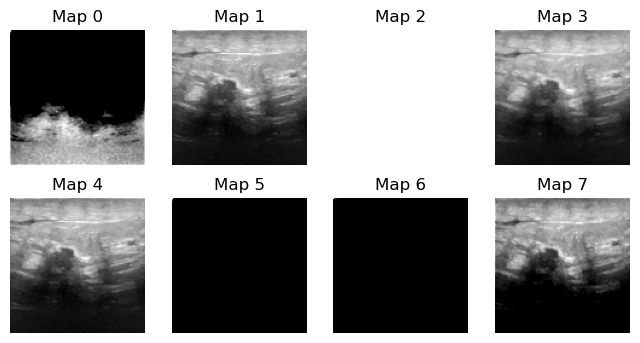

Epoch 7 Feature maps conv2:


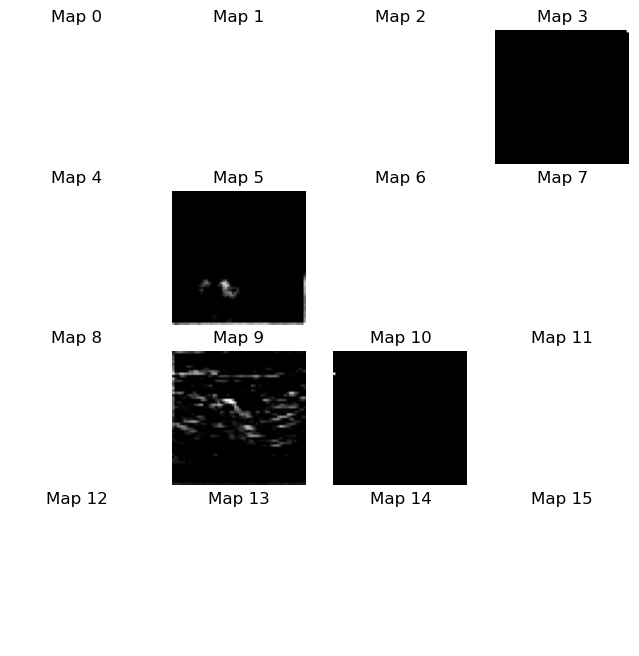

torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([

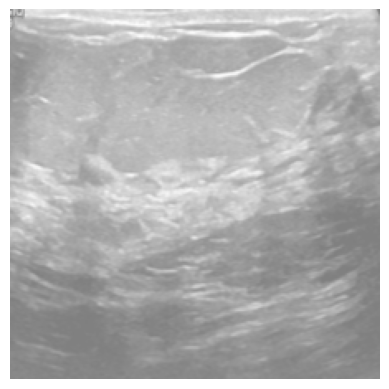

Epoch 8 Kernels conv1:


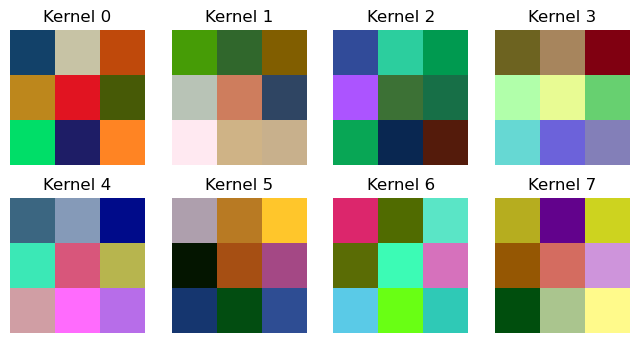

Epoch 8 Feature maps conv1:


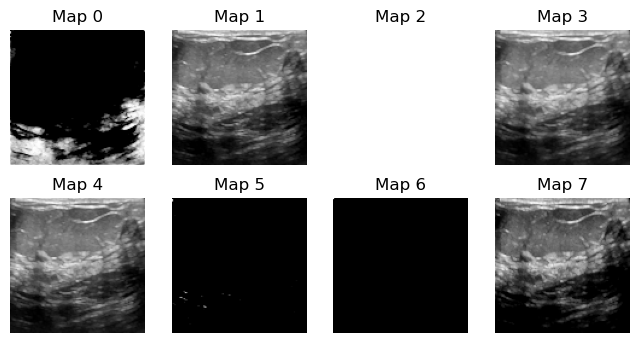

Epoch 8 Feature maps conv2:


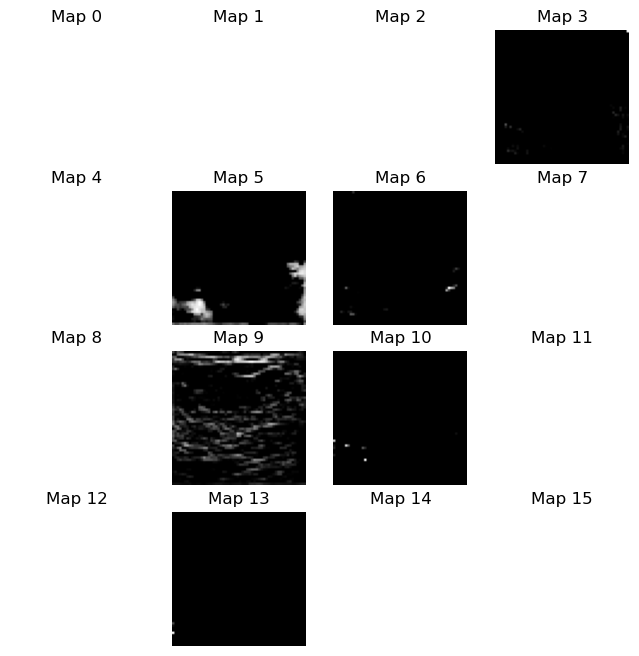

torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([

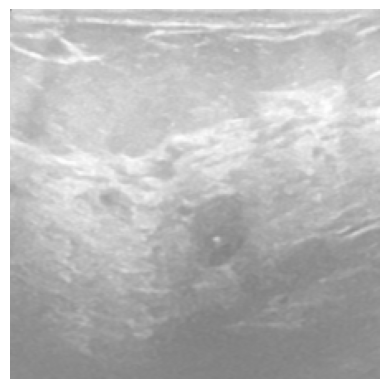

Epoch 9 Kernels conv1:


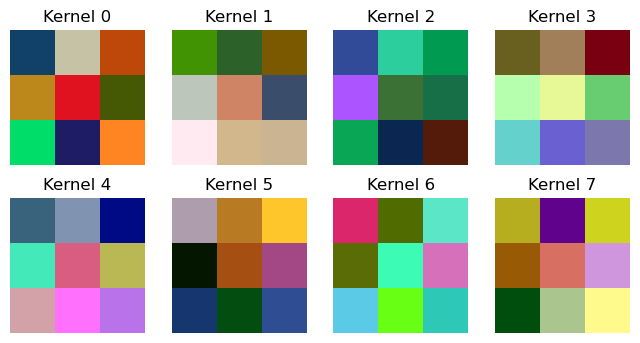

Epoch 9 Feature maps conv1:


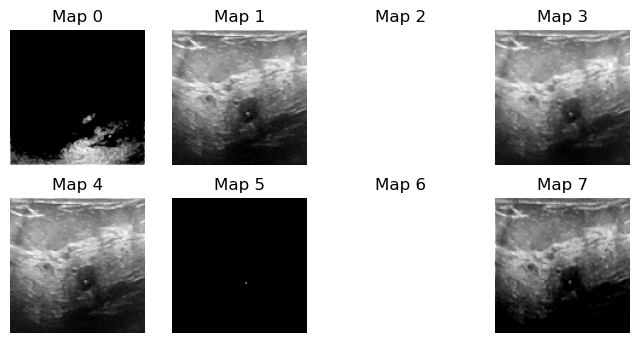

Epoch 9 Feature maps conv2:


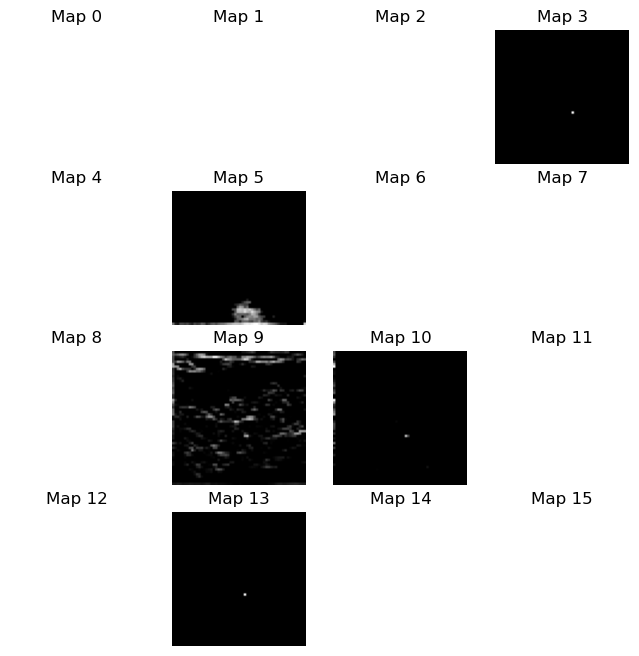

torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([

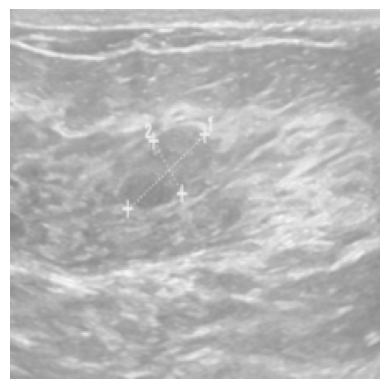

Epoch 10 Kernels conv1:


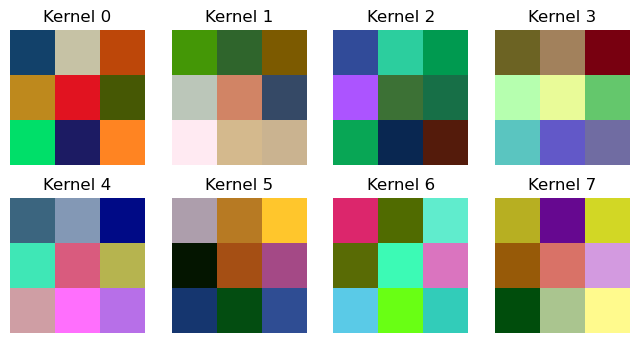

Epoch 10 Feature maps conv1:


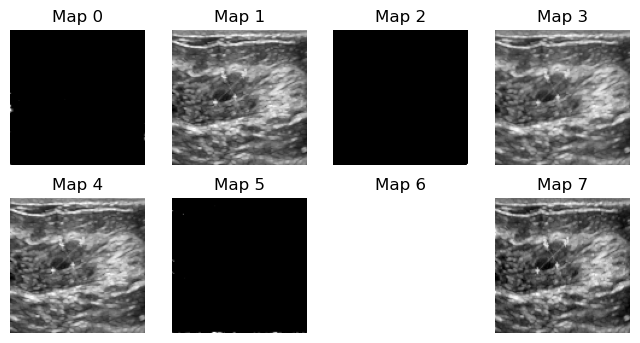

Epoch 10 Feature maps conv2:


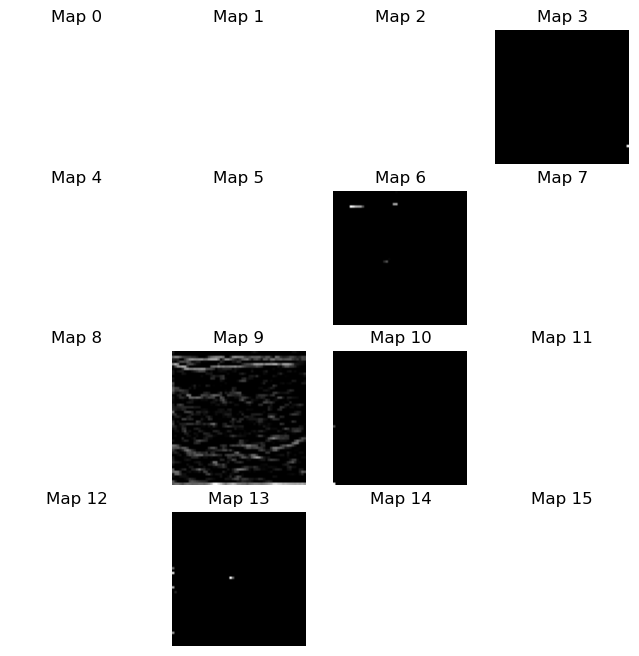

torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([1, 8, 112, 112])
torch.Size([1, 16, 56, 56])
torch.Size([1, 3])
torch.Size([

In [140]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 10  # Keep small for testing

for epoch in range(num_epochs):
    for batch_idx, (inputs, labels) in enumerate(train_loader):
        inputs, labels = inputs, labels

        optimizer.zero_grad()
        outputs, fmap1, fmap2 = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Visualize kernels and feature maps after first batch of each epoch
        if batch_idx % 1 == 0:
            print("Label:", labels[0].item())
            plot_image(inputs[0])

            print(f"Epoch {epoch+1} Kernels conv1:")
            plot_kernels(model.conv1)

            print(f"Epoch {epoch+1} Feature maps conv1:")
            plot_feature_maps(fmap1)

            print(f"Epoch {epoch+1} Feature maps conv2:")
            plot_feature_maps(fmap2)

    print(f"Epoch [{epoch+1}/{num_epochs}] Loss: {loss.item():.4f}")
